In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stats

# Load data

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

## Data Description

<div class="alert alert-block alert-info">

- <font color='white'>__Bank client data__</font>:
    1. <font color='green'>age</font> (numeric)
    2. <font color='green'>job</font> : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3. <font color='green'>marital</font> : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    4. <font color='green'>education</font> (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    5. <font color='green'>default</font>: has credit in default? (categorical: "no","yes","unknown")
    6. <font color='green'>housing</font>: has housing loan? (categorical: "no","yes","unknown")
    7. <font color='green'>loan</font>: has personal loan? (categorical: "no","yes","unknown")
    
    
- <font color='white'>__Related with the last contact of the current campaign__</font>:
    8. <font color='green'>contact</font>: contact communication type (categorical: "cellular","telephone") 
    9. <font color='green'>month</font>: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    10. <font color='green'>day_of_week</font>: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    11. <font color='green'>duration</font>: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
    
- <font color='white'>__Other attributes__</font>:
    12. <font color='green'>campaign</font>: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13. <font color='green'>pdays</font>: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14. <font color='green'>previous</font>: number of contacts performed before this campaign and for this client (numeric)
    15. <font color='green'>poutcome</font>: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
    

- <font color='white'>__Social and economic context attributes__</font>
    16. <font color='green'>emp.var.rate</font>: employment variation rate - quarterly indicator (numeric)
    17. <font color='green'>cons.price.idx</font>: consumer price index - monthly indicator (numeric)     
    18. <font color='green'>cons.conf.idx</font>: consumer confidence index - monthly indicator (numeric)     
    19. <font color='green'>euribor3m</font>: euribor 3 month rate - daily indicator (numeric)
    20. <font color='green'>nr.employed</font>: number of employees - quarterly indicator (numeric)
    

- <font color='white'>__Output variable (desired target)__</font>:
    21. <font color='green'>y</font> - has the client subscribed a term deposit? (binary: "yes","no")

</div>

## Overview Data

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values 

    return summary

In [5]:
resumetable(df)

Dataset Shape: (41188, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,age,int64,0,78,56,57,37
1,job,object,0,12,housemaid,services,services
2,marital,object,0,4,married,married,married
3,education,object,0,8,basic.4y,high.school,high.school
4,default,object,0,3,no,unknown,no
5,housing,object,0,3,no,no,yes
6,loan,object,0,3,no,no,no
7,contact,object,0,2,telephone,telephone,telephone
8,month,object,0,10,may,may,may
9,day_of_week,object,0,5,mon,mon,mon


## Target Variable Distribution

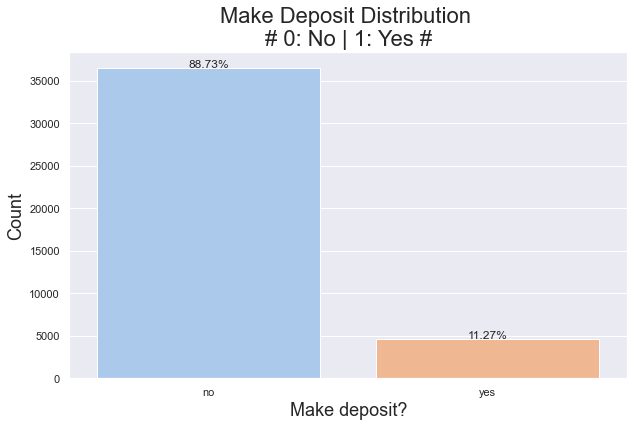

In [13]:
total = len(df)

sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(10,6))

#plt.subplot(121)
g = sns.countplot(x='y', data=df, )
g.set_title("Make Deposit Distribution \n# 0: No | 1: Yes #", fontsize=22)
g.set_xlabel("Make deposit?", fontsize=18)
#g.tick_params(axis='both', colors="red")
g.set_ylabel('Count', fontsize=18)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12)

## Categorical Data Distribution

In [44]:
def plot_count_categorical_feature(dataframe):
    total = len(dataframe)
    cat_cols = dataframe.dtypes[(dataframe.dtypes != "int64") & (dataframe.dtypes != "float64")].index.tolist()

    sns.set_theme(style="darkgrid", palette="pastel")
    #plt.figure(figsize=(10,6))
    
    fig, axes = plt.subplots(round(len(cat_cols) / 3), 3, figsize=(15, 15))

    for i, ax in enumerate(fig.axes):
        if i < len(cat_cols):
            ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
            g = sns.countplot(x=cat_cols[i], alpha=0.7, data=dataframe, ax=ax)
            for p in g.patches:
                height = p.get_height()
                g.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/total*100),
                        ha="center", fontsize=12)

    fig.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14456\3509164916.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14456\3509164916.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14456\3509164916.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14456\3509164916.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14456\3509164916.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

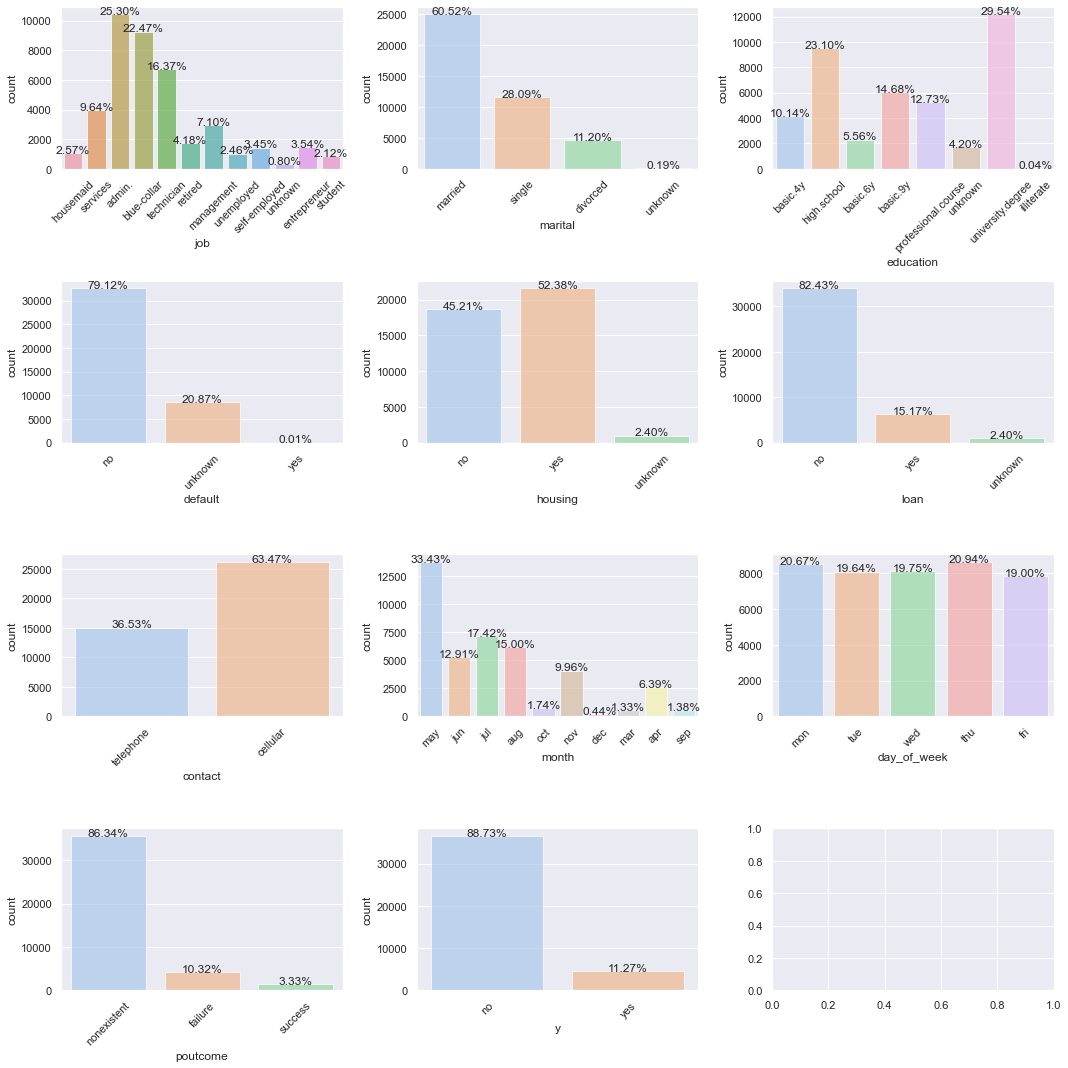

In [45]:
plot_count_categorical_feature(df)

In [27]:
def plot_cat_target(dataframe, col):
    
    total = len(dataframe)
    
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.figure(figsize=(20,6))
    plt.suptitle(f'{col} Distributions with Target Variable', fontsize=22)
        
    plt.subplot(121)
    g = sns.countplot(x=col, data=df, )
    g.set_title(f"{col} Distribution", fontsize=15)
    g.set_xlabel(f"{col}", fontsize=18)
    g.set_ylabel('Count', fontsize=18)
    
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=12)
    
    plt.subplot(122)
    g2 = sns.countplot(x=col, data=df, hue='y')
    g2.set_title(f"{col} Distribution by Target", fontsize=15)
    g2.set_xlabel(f"{col}", fontsize=18)
    g2.set_ylabel('Count', fontsize=18)
    
    for p in g2.patches:
        height = p.get_height()
        g2.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=12)

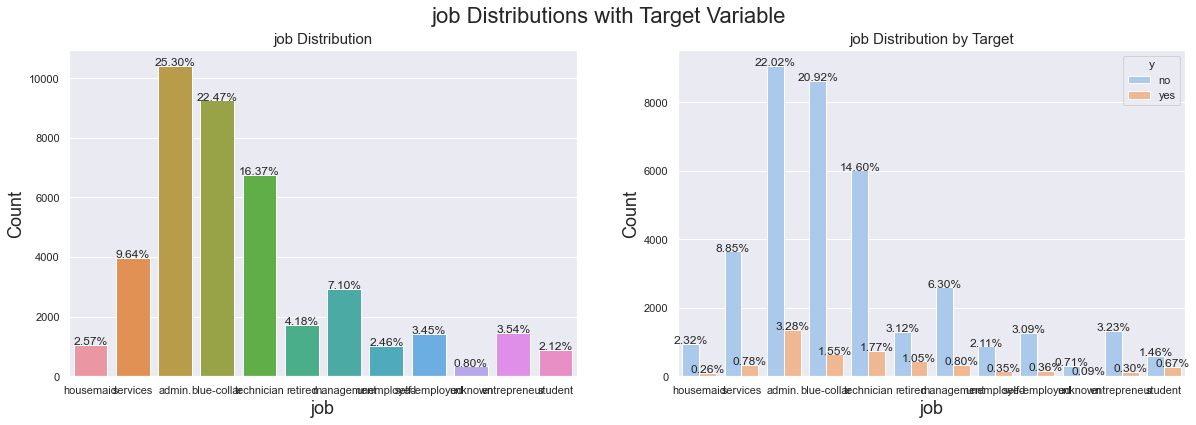

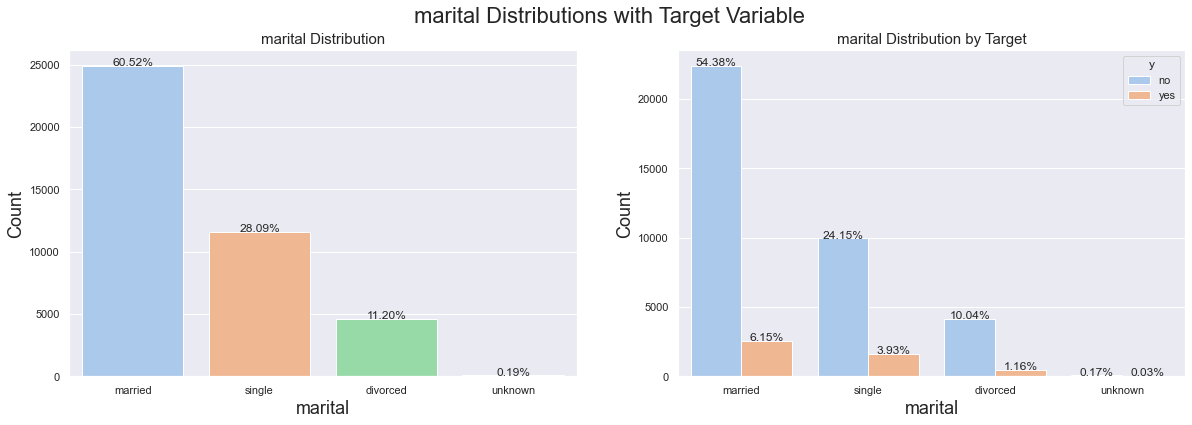

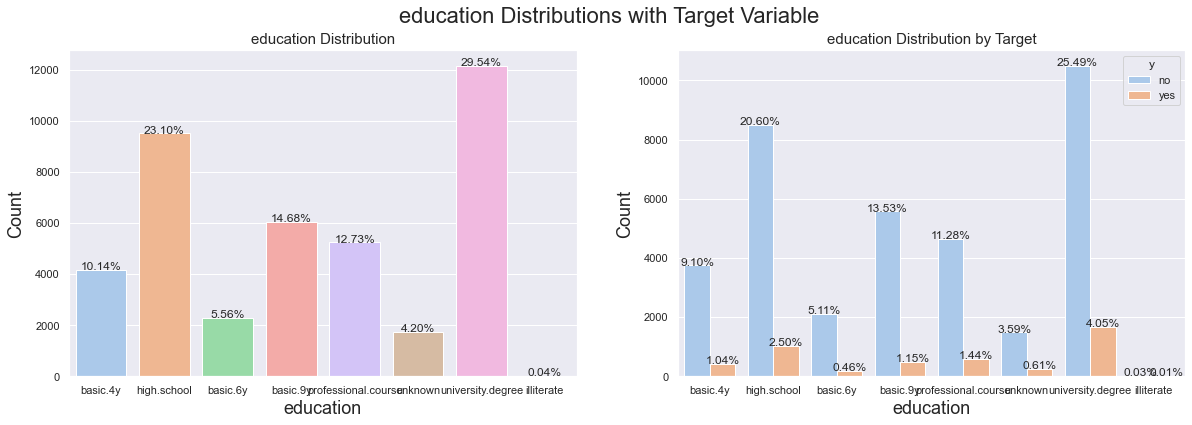

posx and posy should be finite values
posx and posy should be finite values


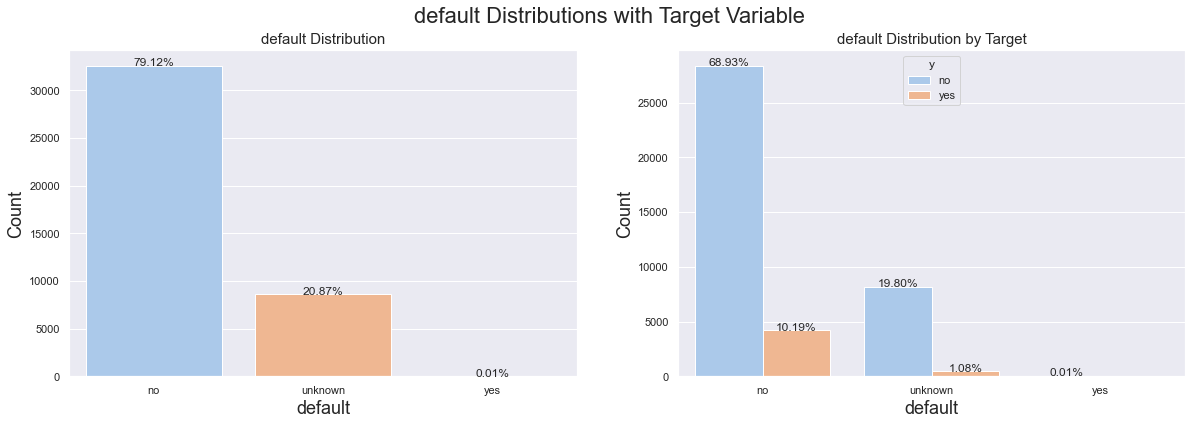

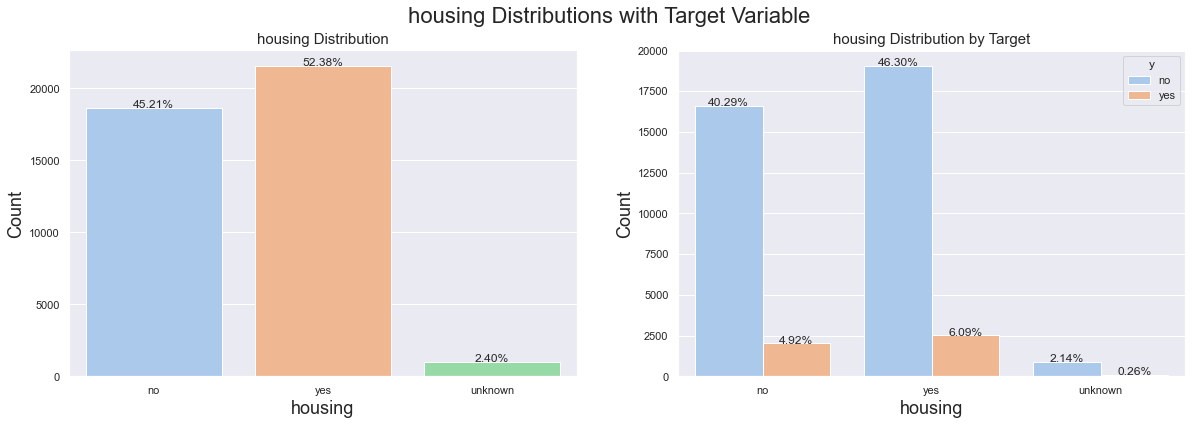

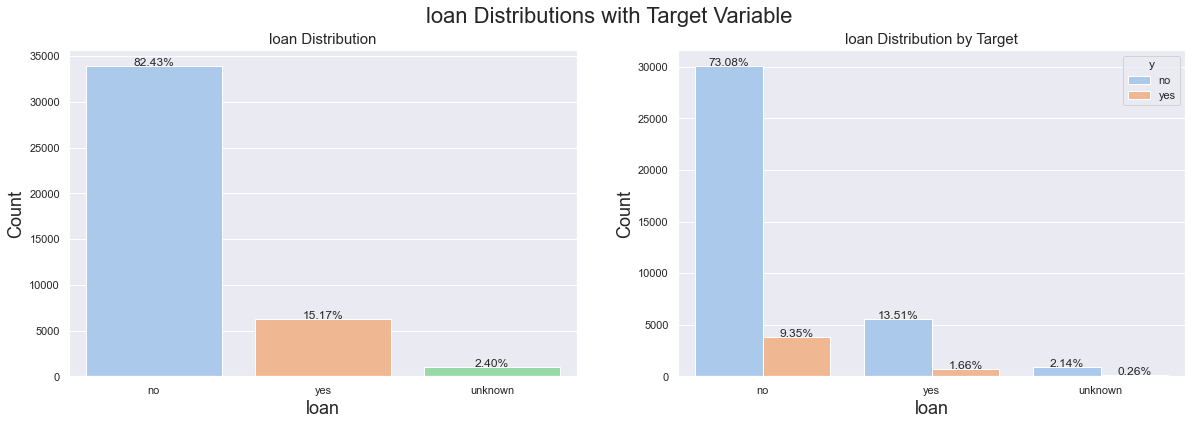

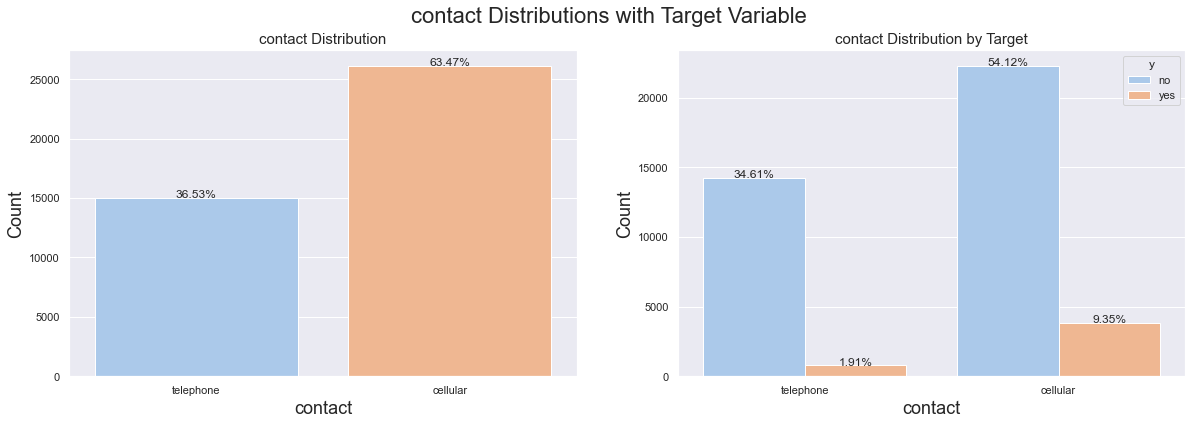

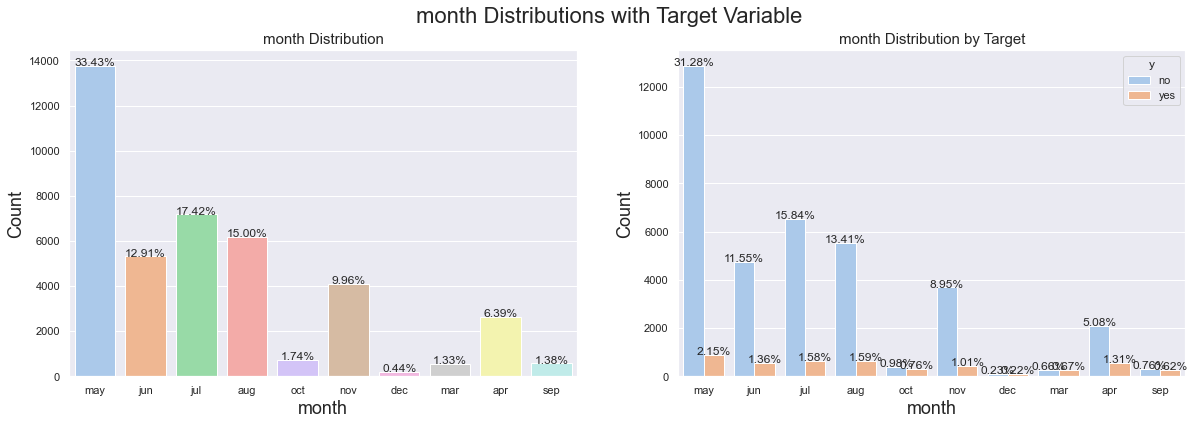

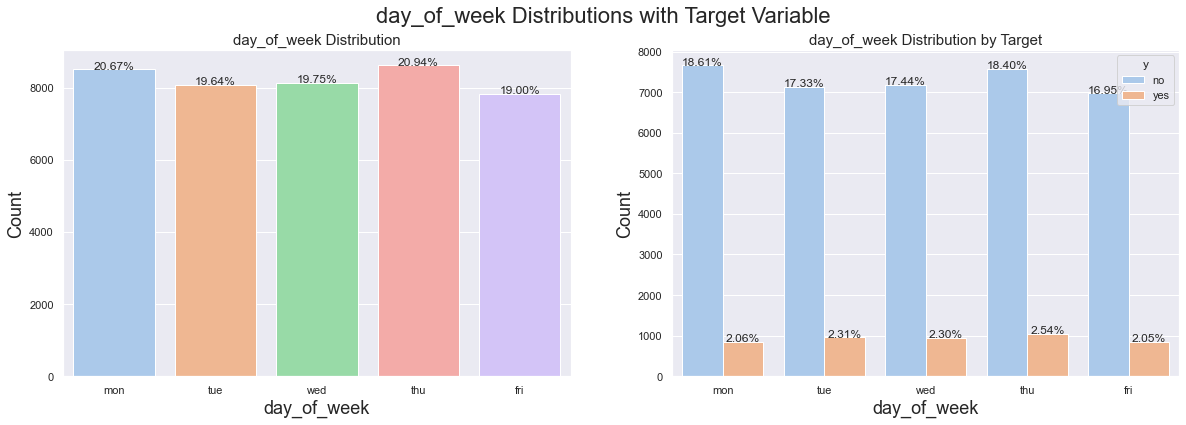

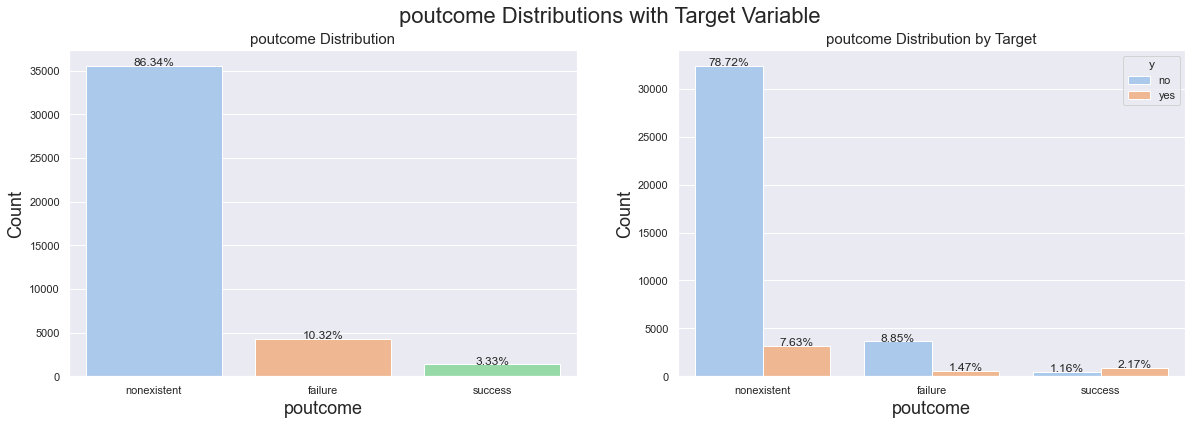

In [28]:
cat_cols = df.dtypes[(df.dtypes != "int64") & (df.dtypes != "float64")].index.tolist()

for c in cat_cols:
    if c != "y":
        plot_cat_target(df, c)

## Numerical Variable

In [25]:
num_cols = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")].index.tolist()

In [26]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [29]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

def plot_num_target(dataframe, col):
    
    total = len(dataframe)
    
    sns.set_theme(style="darkgrid", palette="pastel")
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(f'{col} Distributions with Target Variable', fontsize=22)
    
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)
        
    plt.subplot(gs[0, 0])
    g = sns.distplot(x=dataframe[col], color='green')
    g.set_title(f"{col} Distribution", fontsize=15)
    g.set_xlabel(f"{col}")

    
    plt.subplot(gs[0, 1])
    g2 = sns.boxplot(x='y', y=col, data=dataframe)
    g2.set_title(f"{col} vs Target", fontsize=15)
    g2.set_xlabel("Make Deposit?", fontsize=18)
    #g2.set_ylabel(f'{col}', fontsize=18)
    
    plt.subplot(gs[1, 0])
    g3 = sns.distplot(x=dataframe[dataframe['y']=='no'][col], label='No')
    g3 = sns.distplot(x=dataframe[dataframe['y']=='yes'][col], label='Yes')
    g3.legend()
    g3.set_title(f"{col} Distribution by Target", fontsize=15)
    g3.set_xlabel(f"{col}")
    
    gs.tight_layout(fig)

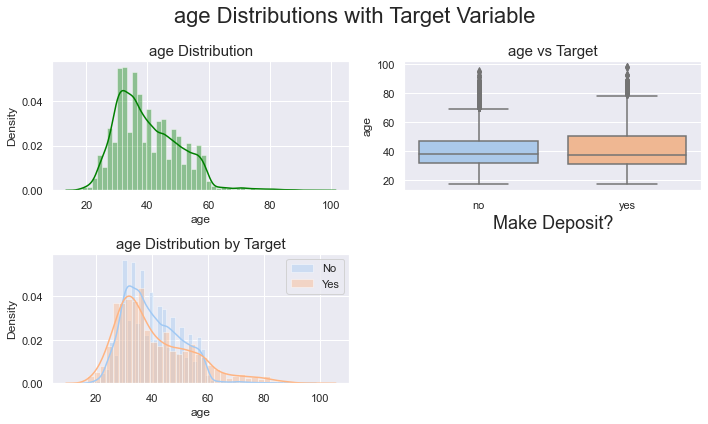

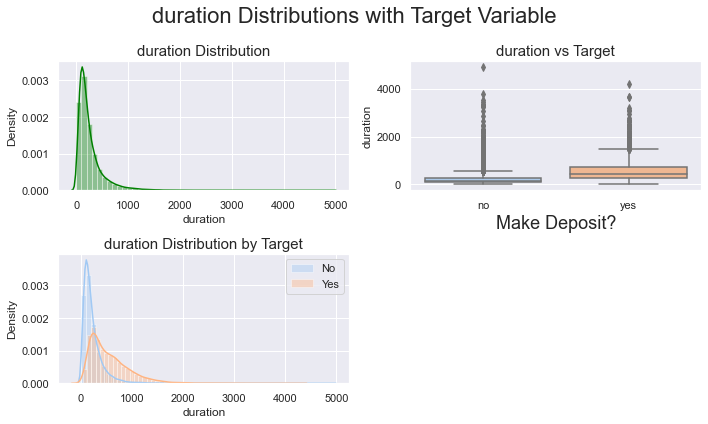

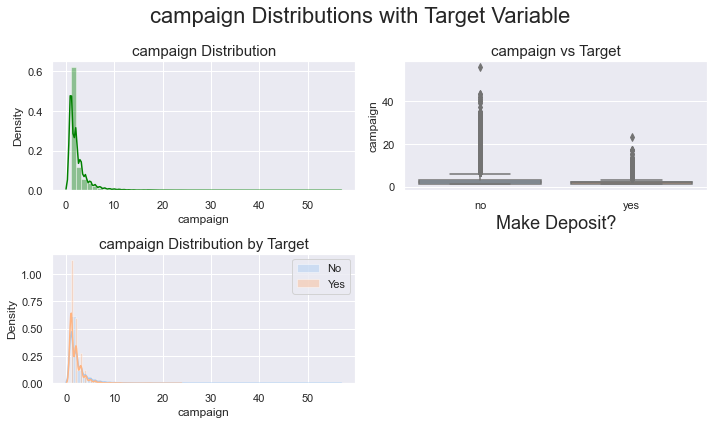

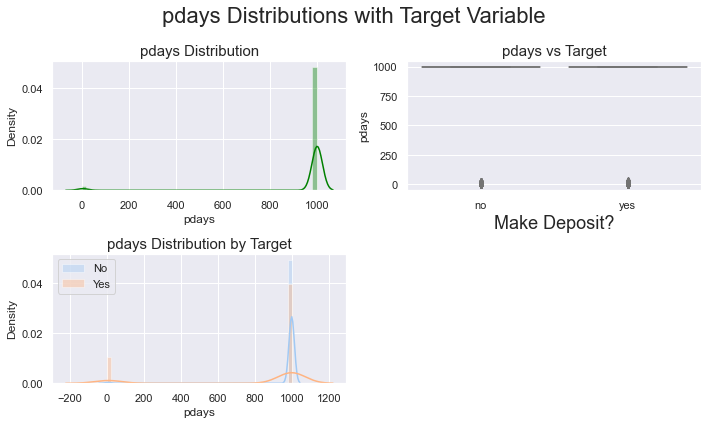

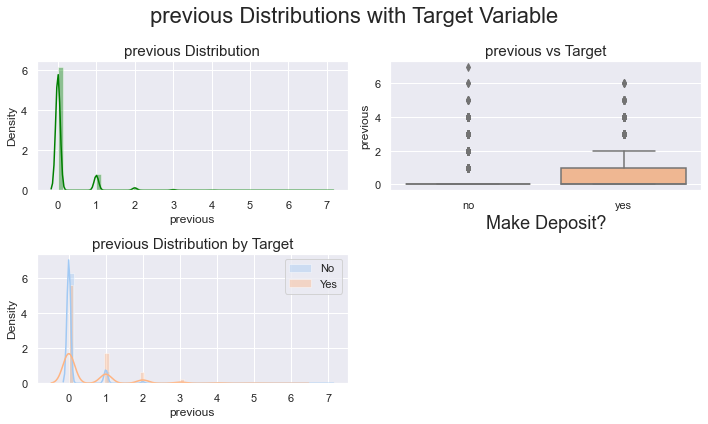

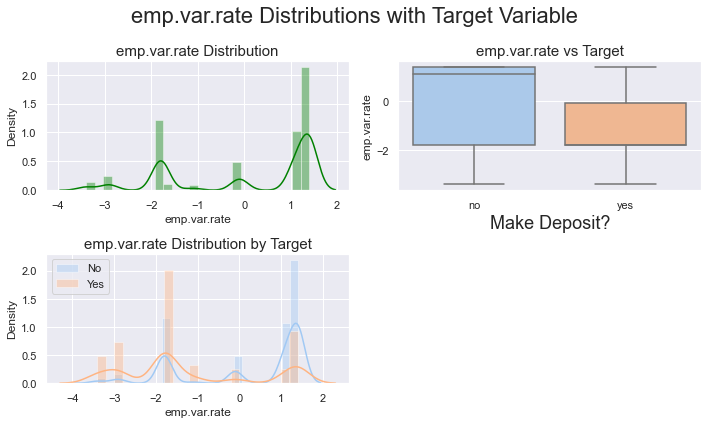

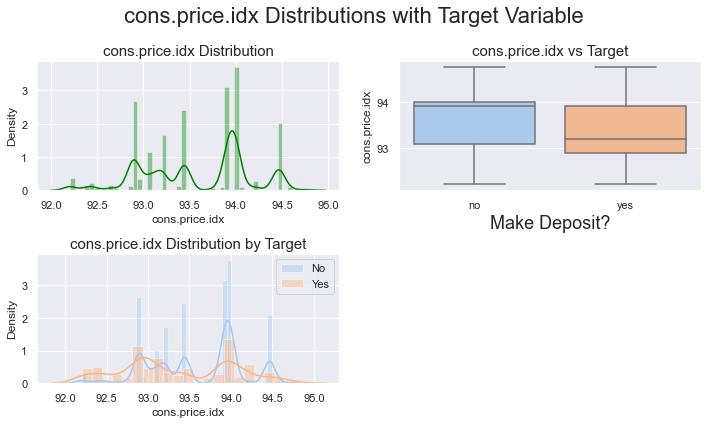

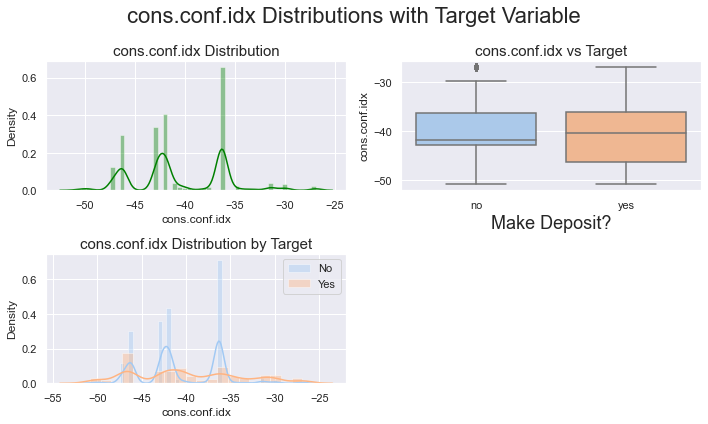

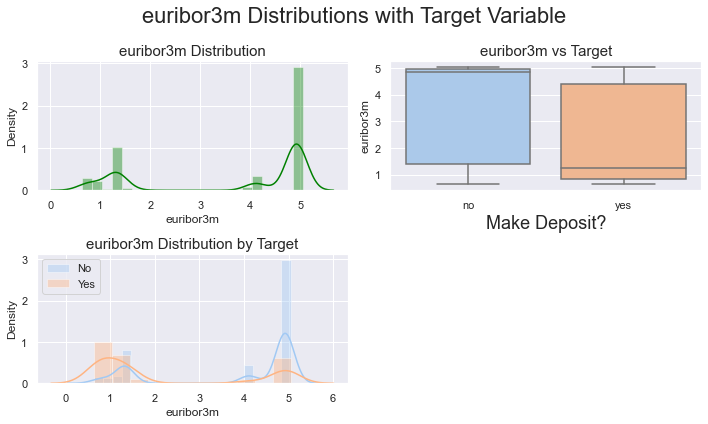

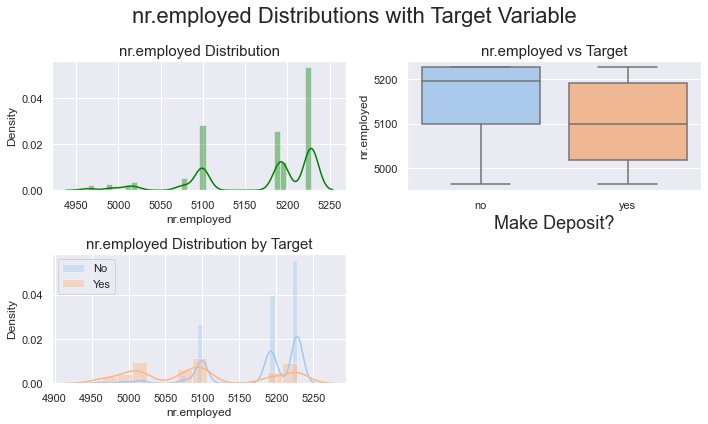

In [139]:
for c in num_cols:
    plot_num_target(df, c)

# Preprocessing

## Split train-test

In [6]:
X = df.loc[:, df.columns!='y']
y = df['y']

In [7]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [8]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
df_test = pd.concat([X_test, y_test], axis=1)

In [21]:
df_test.to_csv('data_test.csv', index=False)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [23]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.to_csv('data_train.csv', index=False)

df_valid = pd.concat([X_valid, y_valid], axis=1)
df_valid.to_csv('data_valid.csv', index=False)

## Scaling

In [33]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [37]:
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [41]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29286,-0.002003,housemaid,married,basic.6y,unknown,unknown,unknown,cellular,apr,fri,10.236648,-0.204826,0.196709,-0.349075,nonexistent,-1.200784,-0.865459,-1.426484,-1.277791,-0.936257
1679,-0.097999,services,married,high.school,no,yes,no,telephone,may,fri,-0.661001,-0.204826,0.196709,-0.349075,nonexistent,0.645647,0.716019,0.882707,0.709718,0.329983
38939,-1.441944,technician,single,professional.course,no,yes,no,cellular,nov,wed,1.084925,-0.564701,0.196709,-0.349075,nonexistent,-2.219505,-1.598548,2.242324,-1.674716,-2.060580
12809,-1.441944,technician,single,university.degree,no,no,no,cellular,jul,tue,0.774112,0.155050,0.196709,-0.349075,nonexistent,0.836657,0.585233,-0.476910,0.771359,0.841164
23180,0.093993,unemployed,divorced,professional.course,no,unknown,unknown,cellular,aug,tue,0.048881,0.155050,0.196709,-0.349075,nonexistent,0.836657,-0.230458,0.947451,0.773087,0.841164


In [39]:
X_valid[num_cols] = scaler.transform(X_valid[num_cols])

In [42]:
X_valid.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
31717,-0.865968,technician,married,professional.course,no,yes,no,cellular,may,thu,-0.100770,-0.564701,0.196709,-0.349075,nonexistent,-1.200784,-1.178656,-1.232253,-1.322726,-0.936257
25250,-0.289991,unemployed,single,university.degree,no,yes,no,cellular,nov,tue,-0.472979,-0.204826,0.196709,-0.349075,nonexistent,-0.118393,-0.650350,-0.325841,0.305303,0.396120
33840,-1.057960,blue-collar,single,basic.9y,no,yes,no,cellular,may,wed,1.035041,-0.564701,0.196709,1.652145,failure,-1.200784,-1.178656,-1.232253,-1.349226,-0.936257
29685,0.957958,technician,married,professional.course,no,yes,no,cellular,apr,mon,-0.845187,-0.564701,0.196709,-0.349075,nonexistent,-1.200784,-0.865459,-1.426484,-1.277791,-0.936257
37922,-0.769972,admin.,married,university.degree,no,no,no,cellular,sep,thu,0.712716,-0.564701,0.196709,1.652145,failure,-2.219505,-2.063183,2.307068,-1.621140,-2.060580


## Encode categorical variable

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
cat_cols = df.dtypes[(df.dtypes != "int64") & (df.dtypes != "float64")].index.tolist()
cat_cols.remove('y')

transformer = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), cat_cols),
        remainder='passthrough')

X_train_transformed = transformer.fit_transform(X_train)

In [62]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())

In [63]:
X_train_transformed

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,remainder__age,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002003,10.236648,-0.204826,0.196709,-0.349075,-1.200784,-0.865459,-1.426484,-1.277791,-0.936257
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.097999,-0.661001,-0.204826,0.196709,-0.349075,0.645647,0.716019,0.882707,0.709718,0.329983
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.441944,1.084925,-0.564701,0.196709,-0.349075,-2.219505,-1.598548,2.242324,-1.674716,-2.060580
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.441944,0.774112,0.155050,0.196709,-0.349075,0.836657,0.585233,-0.476910,0.771359,0.841164
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093993,0.048881,0.155050,0.196709,-0.349075,0.836657,-0.230458,0.947451,0.773087,0.841164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.189989,0.394229,-0.564701,0.196709,-0.349075,0.645647,0.716019,0.882707,0.710870,0.329983
26356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.289991,-0.062398,0.514925,0.196709,-0.349075,0.836657,0.585233,-0.476910,0.771935,0.841164
26357,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002003,-0.296467,-0.564701,0.196709,1.652145,-0.118393,-0.650350,-0.325841,0.305303,0.396120
26358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.961964,-0.699373,-0.564701,0.196709,-0.349075,0.836657,-0.230458,0.947451,0.771935,0.841164


In [64]:
X_valid_transformed = transformer.transform(X_valid)

In [65]:
X_valid_transformed = pd.DataFrame(X_valid_transformed, columns=transformer.get_feature_names_out())

In [66]:
X_valid_transformed

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,remainder__age,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.865968,-0.100770,-0.564701,0.196709,-0.349075,-1.200784,-1.178656,-1.232253,-1.322726,-0.936257
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.289991,-0.472979,-0.204826,0.196709,-0.349075,-0.118393,-0.650350,-0.325841,0.305303,0.396120
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.057960,1.035041,-0.564701,0.196709,1.652145,-1.200784,-1.178656,-1.232253,-1.349226,-0.936257
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.957958,-0.845187,-0.564701,0.196709,-0.349075,-1.200784,-0.865459,-1.426484,-1.277791,-0.936257
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.769972,0.712716,-0.564701,0.196709,1.652145,-2.219505,-2.063183,2.307068,-1.621140,-2.060580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.097999,-0.288793,-0.564701,0.196709,-0.349075,-0.182063,-1.414415,-1.167509,-0.112362,0.127440
6586,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.865968,-0.100770,-0.204826,-5.046734,1.652145,-0.755094,1.068797,0.645314,-1.580814,-2.803239
6587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.633936,0.045043,0.155050,0.196709,1.652145,-0.755094,1.068797,0.645314,-1.580814,-2.803239
6588,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.549852,0.229229,0.155050,0.196709,-0.349075,-1.200784,0.512957,0.105783,-1.693151,-2.181830


## Encode target variable

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)

In [70]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [72]:
y_valid = le.transform(y_valid)

In [73]:
y_valid

array([0, 0, 0, ..., 1, 0, 0])

# Modelling

## Random Forest

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000, random_state=11)

In [82]:
clf_rf.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=500, random_state=11)

In [83]:
y_pred = clf_rf.predict(X_valid_transformed)

## Light GBM

In [92]:
from sklearn import metrics
import lightgbm as lgb
import time

def fast_auc(y_true, y_prob):
    """
    fast roc_auc computation: https://www.kaggle.com/c/microsoft-malware-prediction/discussion/76013
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i * nfalse
    auc /= (nfalse * (n - nfalse))
    return auc


def eval_auc(y_true, y_pred):
    """
    Fast auc eval function for lgb.
    """
    return 'auc', fast_auc(y_true, y_pred), True


def train_model_classification(X, X_test, y, params, folds, model_type='lgb', eval_metric='auc', columns=None, 
                               plot_feature_importance=False, model=None,
                               verbose=10000, early_stopping_rounds=200, n_estimators=50000, 
                               splits=None, n_folds=3, averaging='usual', n_jobs=-1):
    """
    A function to train a variety of classification models.
    Returns dictionary with oof predictions, test predictions, scores and, if necessary, feature importances.
    
    :params: X - training data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: X_test - test data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: y - target
    :params: folds - folds to split data
    :params: model_type - type of model to use
    :params: eval_metric - metric to use
    :params: columns - columns to use. If None - use all columns
    :params: plot_feature_importance - whether to plot feature importance of LGB
    :params: model - sklearn model, works only for "sklearn" model type
    
    """
    columns = X.columns if columns is None else columns
    n_splits = folds.n_splits if splits is None else n_folds
    X_test = X_test[columns]
    
    # to set up scoring parameters
    metrics_dict = {'auc': {'lgb_metric_name': eval_auc,
                        'catboost_metric_name': 'AUC',
                        'sklearn_scoring_function': metrics.roc_auc_score},
                    }
    
    result_dict = {}
    if averaging == 'usual':
        # out-of-fold predictions on train data
        oof = np.zeros((len(X), 1))

        # averaged predictions on train data
        prediction = np.zeros((len(X_test), 1))
        
    elif averaging == 'rank':
        # out-of-fold predictions on train data
        oof = np.zeros((len(X), 1))

        # averaged predictions on train data
        prediction = np.zeros((len(X_test), 1))

    
    # list of scores on folds
    scores = []
    feature_importance = pd.DataFrame()
    
    # split and train on folds
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print(f'Fold {fold_n + 1} started at {time.ctime()}')
        if type(X) == np.ndarray:
            X_train, X_valid = X[columns][train_index], X[columns][valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
        if model_type == 'lgb':
            model = lgb.LGBMClassifier(**params, n_estimators=n_estimators, n_jobs = n_jobs)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
                    verbose=verbose, early_stopping_rounds=early_stopping_rounds)
            
            y_pred_valid = model.predict_proba(X_valid)[:, 1]
            y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)[:, 1]
            
#         if model_type == 'xgb':
#             train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
#             valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

#             watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
#             model = xgb.train(dtrain=train_data, num_boost_round=n_estimators, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=verbose, params=params)
#             y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
#             y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
#         if model_type == 'sklearn':
#             model = model
#             model.fit(X_train, y_train)
            
#             y_pred_valid = model.predict(X_valid).reshape(-1,)
#             score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid)
#             print(f'Fold {fold_n}. {eval_metric}: {score:.4f}.')
#             print('')
            
#             y_pred = model.predict_proba(X_test)
        
#         if model_type == 'cat':
#             model = CatBoostClassifier(iterations=n_estimators, eval_metric=metrics_dict[eval_metric]['catboost_metric_name'], **params,
#                                       loss_function=Logloss)
#             model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

#             y_pred_valid = model.predict(X_valid)
#             y_pred = model.predict(X_test)
        
        if averaging == 'usual':
            
            oof[valid_index] = y_pred_valid.reshape(-1, 1)
            scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
            
            prediction += y_pred.reshape(-1, 1)

        elif averaging == 'rank':
                                  
            oof[valid_index] = y_pred_valid.reshape(-1, 1)
            scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
                                  
            prediction += pd.Series(y_pred).rank().values.reshape(-1, 1)        
        
        if model_type == 'lgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_splits
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    result_dict['oof'] = oof
    result_dict['prediction'] = prediction
    result_dict['scores'] = scores
    
    if model_type == 'lgb':
        if plot_feature_importance:
            feature_importance["importance"] /= n_splits
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
            
            result_dict['feature_importance'] = feature_importance
            result_dict['top_columns'] = cols
        
    return result_dict, model

In [101]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5)
y_train = pd.DataFrame(y_train, columns=['label'])

In [106]:
for c in cat_cols:
    X_train[c] = X_train[c].astype('category')
    
for c in cat_cols:
    X_valid[c] = X_valid[c].astype('category')

Fold 1 started at Fri Mar  4 19:41:45 2022
Fold 2 started at Fri Mar  4 19:42:37 2022
Fold 3 started at Fri Mar  4 19:43:25 2022
Fold 4 started at Fri Mar  4 19:44:20 2022
Fold 5 started at Fri Mar  4 19:45:14 2022
CV mean score: 0.9474, std: 0.0014.


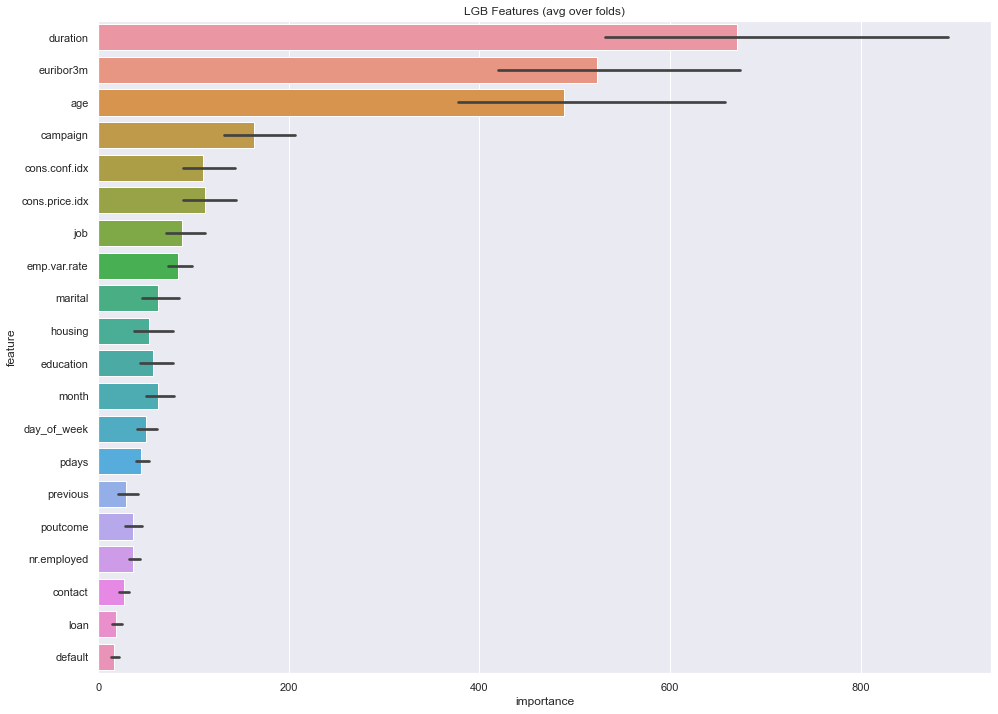

In [107]:
params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          'categorical_feature': cat_cols
         }
result_dict_lgb = train_model_classification(X=X_train, X_test=X_valid, y=y_train, params=params, folds=folds, model_type='lgb', 
                                             eval_metric='auc', plot_feature_importance=True,
                                             verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='usual', 
                                             n_jobs=-1)

# Evaluation

## Random Forest

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, y_pred)

array([[5691,  157],
       [ 430,  312]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5848
           1       0.67      0.42      0.52       742

    accuracy                           0.91      6590
   macro avg       0.80      0.70      0.73      6590
weighted avg       0.90      0.91      0.90      6590



## Light GBM

In [133]:
y_pred_lgbm = []
for i in result_dict_lgb['prediction']:
    if i[0] < 0.7:
        y_pred_lgbm.append(0)
    else:
        y_pred_lgbm.append(1)

In [134]:
y_pred_lgbm = np.array(y_pred_lgbm)

In [135]:
print(classification_report(y_valid, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5848
           1       0.76      0.21      0.33       742

    accuracy                           0.90      6590
   macro avg       0.83      0.60      0.64      6590
weighted avg       0.89      0.90      0.88      6590



# Retrain with entire dataset using Pipeline

In [ ]:
# Random Forest

In [2]:
X_train = pd.read_csv('data_train.csv', sep=',')
X_valid = pd.read_csv('data_valid.csv', sep=',')

In [6]:
df_train = pd.concat([X_train, X_valid], axis=0)

In [8]:
X = df_train.iloc[:, :-1]
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,housemaid,married,basic.6y,unknown,unknown,unknown,cellular,apr,fri,2926,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
1,39,services,married,high.school,no,yes,no,telephone,may,fri,86,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,technician,single,professional.course,no,yes,no,cellular,nov,wed,541,1,999,0,nonexistent,-3.4,92.649,-30.1,0.716,5017.5
3,25,technician,single,university.degree,no,no,no,cellular,jul,tue,460,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
4,41,unemployed,divorced,professional.course,no,unknown,unknown,cellular,aug,tue,271,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,39,technician,married,professional.course,no,yes,no,telephone,dec,tue,183,1,999,0,nonexistent,-0.2,92.756,-45.9,3.428,5176.3
6586,31,admin.,married,university.degree,no,yes,no,cellular,sep,fri,232,2,13,1,success,-1.1,94.199,-37.5,0.879,4963.6
6587,23,admin.,single,university.degree,no,no,no,cellular,sep,thu,270,3,999,1,failure,-1.1,94.199,-37.5,0.879,4963.6
6588,77,retired,married,unknown,no,yes,yes,cellular,may,fri,318,3,999,0,nonexistent,-1.8,93.876,-40.0,0.684,5008.7


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = preprocessing.StandardScaler()
num_cols = df_train.dtypes[(df_train.dtypes == "int64") | (df_train.dtypes == "float64")].index.tolist()

cat_cols = df_train.dtypes[(df_train.dtypes != "int64") & (df_train.dtypes != "float64")].index.tolist()
cat_cols.remove('y')

transformer = ColumnTransformer(transformers=[
                                            ('scaler', scaler, num_cols),
                                            ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                                        remainder='passthrough')

In [15]:
pipe = Pipeline([('transformer', transformer),
                 ('model_rf', RandomForestClassifier(n_estimators=1000, random_state=11))
                ])

In [16]:
y = df_train.iloc[:, -1]

In [17]:
pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                

In [18]:
import joblib
joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [27]:
pipe.predict(X.iloc[1:3, :])

array(['no', 'yes'], dtype=object)

# Deploy to Tableau

In [136]:
# create a function that loads pipeline model and return prediction
# then deploy to tableau

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stats
import joblib

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
pipe = joblib.load('model.pkl')

In [5]:
import tabpy_client
from tabpy.tabpy_tools.client import Client
client = tabpy_client.Client('http://localhost:9004/')

In [7]:
X = pd.read_csv('data_test.csv')

In [16]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
def predict_bank(age, job, marital, education, default, housing, loan,
                   contact, month, day_of_week, duration, campaign, pdays,
                   previous, poutcome, emp_var_rate, cons_price_idx,
                   cons_conf_idx, euribor3m, nr_employed):
    
    X = np.column_stack([age, job, marital, education, default, housing, loan,
                   contact, month, day_of_week, duration, campaign, pdays,
                   previous, poutcome, emp.var.rate, cons.price.idx,
                   cons.conf.idx, euribor3m, nr.employed])
    
    pred = pipe.predict(X)
    
    return [pred]

In [15]:
# Deploy
client.deploy('bank-marketing', predict_bank,'make termed deposit?', override = True)

In [ ]:
# This way of deploying is only for predicting a single instance
# To predict a whole dataframe, use tableau prep and .py file